# Coined Quantum walk in a cycle implementation

CnNot implementation is done by decomposition as shown in the paper. This function is present in CnotDecomp file.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit import *
from qiskit.visualization import plot_histogram
%run CnotDecomp.ipynb #for importing ccx function

The following functions are the base building blocks of the node permutation in the graph, as was done by douglaswang.

In [2]:
def incr(qwc,q,subnode,n):
    for j in range(-1,n-1):
        if(j==-1):
            cnx(qwc,subnode[0],*q[-1::-1])
            qwc.barrier()
        else:
            cnx(qwc,subnode[0],*q[-1:j:-1])
            qwc.barrier()
    return qwc

def decr(qwc,q,subnode,n):
    qwc.x(subnode[0])
    c=0
    qwc.x(q[-1:0:-1])
    for j in range(-1,n-1):
        if(j==-1):
            c+=1
            cnx(qwc,subnode[0],*q[-1::-1])
            qwc.x(q[c])
            qwc.barrier()
        else:
            c+=1
            cnx(qwc,subnode[0],*q[-1:j:-1])
            if(c==n):
                break
            qwc.x(q[c])
            qwc.barrier()
    qwc.x(subnode[0])
    return qwc

The circuit is then built by applying incr and decr consecutively.
Note that graphs that are not powers of 2 will not use the qubits fully, which can cause problems. This will be done in the future.

<ipython-input-1-7ad22d06415b>:7: DeprecationWarning: The QuantumCircuit.cu3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cu method instead, where cu3(ϴ,φ,λ) = cu(ϴ,φ,λ,0).
  qc.cu3(np.pi/2, 0, 0, qubits[-2],qubits[-1])


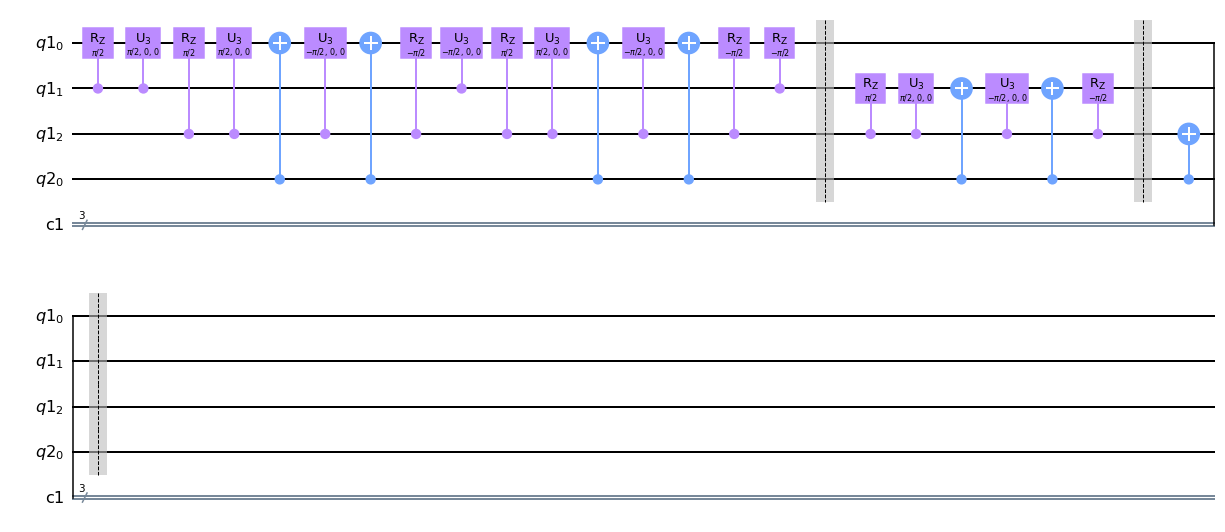

In [3]:
n=3
m=n-1

qreg = QuantumRegister(n)
qsub = QuantumRegister(1)
csub = ClassicalRegister(1)
creg = ClassicalRegister(n)

circ1= QuantumCircuit(qreg,qsub,creg)

#circ1.x(qreg[2])

def runQWC(qwc,times):
    for i in range(0,times):
        qwc.h(qsub[0])
        decr(qwc,qreg,qsub,n)
        incr(qwc,qreg,qsub,n)
        qwc.barrier()
        qwc.measure(qreg,creg)
        qwc.barrier()
        
    return qwc


step = 1
#incr(circ1,qreg,qsub,n)
#circ1 = runQWC(circ1,step)


circ1.draw(output='mpl')

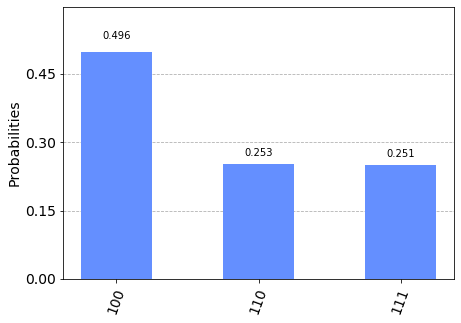

In [12]:
#circuit building
backend = Aer.get_backend('qasm_simulator')

job_sim = execute(circ1, backend=backend, shots=8192,)
#result = job.result()
result_sim = job_sim.result()
result_counts = result_sim.get_counts(circ1)
plot_histogram(result_counts)

In [ ]:
n=2
m=n-1

qreg = QuantumRegister(n)
qsub = QuantumRegister(1)
csub = ClassicalRegister(1)
creg = ClassicalRegister(n)

circ1= QuantumCircuit(qreg,qsub,creg)

def runQWC(qwc,times):
    for i in range(0,times):
        qwc.h(qsub[0])
        incr(qwc,qreg,qsub,n)
        decr(qwc,qreg,qsub,n)
        qwc.barrier()
        qwc.measure(qreg,creg)
        qwc.barrier()
        
    return qwc

step = 1
circ1 = runQWC(circ1,step)

circ1.draw(output='mpl')